In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly 
import plotly.graph_objects as go
import plotly.express as pe 
import plotly.offline as po
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
import warnings
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline,FeatureUnion
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


C:\Users\Al Hamd\AppData\Local\Temp\ipykernel_4804\1612104590.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.api import add_constant

In [3]:
df=pd.read_csv("hypothyroid_data.csv")
df.shape

(3772, 30)

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [5]:
df['Class'].value_counts()

Class
negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

61

In [7]:
df = df.drop_duplicates()


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

age                             1
sex                           149
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           309
T3_measured                     0
T3                            709
TT4_measured                    0
TT4                           171
T4U_measured                    0
T4U                           327
FTI_measured                    0
FTI                           325
TBG_measured                    0
TBG                          3711
referral_source                 0
Class         

In [10]:
for column in df.columns:
    # Count the number of missing values represented by '?'
    count = df[column][df[column] == '?'].count()
    # If missing values are found, print the column name and count
    if count != 0:
        print(column, count)

In [11]:
df = df.drop('TBG', axis=1)
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [12]:
df.shape

(3711, 29)

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

We have 23 categorical features : ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'Class']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3710 non-null   float64
 1   sex                        3562 non-null   object 
 2   on_thyroxine               3711 non-null   object 
 3   query_on_thyroxine         3711 non-null   object 
 4   on_antithyroid_medication  3711 non-null   object 
 5   sick                       3711 non-null   object 
 6   pregnant                   3711 non-null   object 
 7   thyroid_surgery            3711 non-null   object 
 8   I131_treatment             3711 non-null   object 
 9   query_hypothyroid          3711 non-null   object 
 10  query_hyperthyroid         3711 non-null   object 
 11  lithium                    3711 non-null   object 
 12  goitre                     3711 non-null   object 
 13  tumor                      3711 non-null   object 
 1

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3710.0,51.860377,20.123585,1.000,36.00,54.00,67.00,455.00
TSH,3402.0,5.087820,24.524998,0.005,0.50,1.40,2.70,530.00
T3,3002.0,2.013504,0.827572,0.050,1.60,2.00,2.40,10.60
TT4,3540.0,108.328475,35.605132,2.000,88.00,103.00,124.00,430.00
T4U,3384.0,0.994989,0.195485,0.250,0.88,0.98,1.08,2.32
FTI,3386.0,110.480715,33.088316,2.000,93.00,107.00,124.00,395.00


In [16]:
df.isin(['NaN']).sum().sum()

0

In [17]:
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [18]:
df.isna().sum().sort_values(ascending=False)

T3                           709
T4U                          327
FTI                          325
TSH                          309
TT4                          171
sex                          149
age                            1
goitre                         0
referral_source                0
psych                          0
hypopituitary                  0
tumor                          0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
Class                          0
dtype: int64

In [19]:
df['Class'].value_counts()

Class
negative                   3420
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: count, dtype: int64

In [20]:
class_count=df['Class'].value_counts().to_dict()

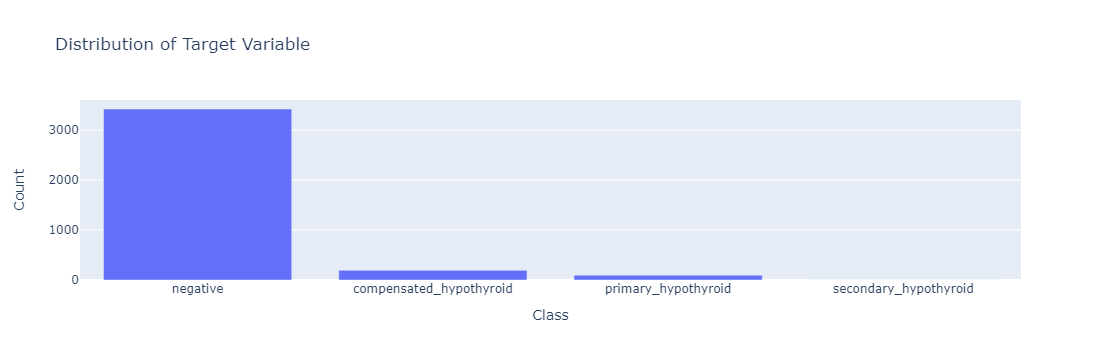

In [21]:
fig = go.Figure(data=[go.Bar(x=list(class_count.keys()), y=list(class_count.values()))])
fig.update_layout(title='Distribution of Target Variable',
                  xaxis_title='Class',
                  yaxis_title='Count')
fig.show()

<Axes: xlabel='age', ylabel='Density'>

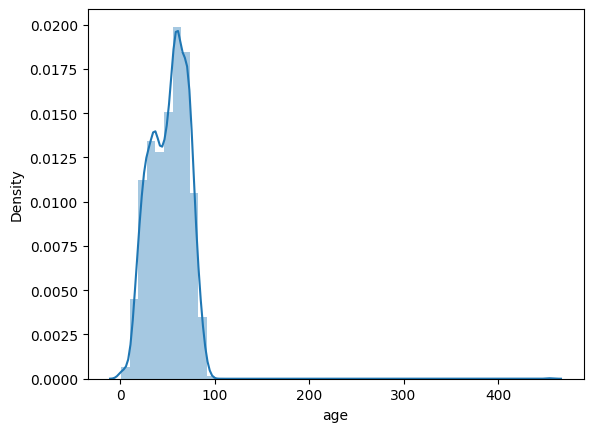

In [22]:
sns.distplot(df['age'])

<Axes: ylabel='age'>

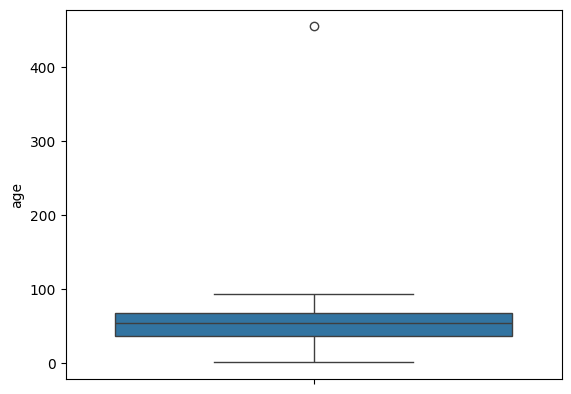

In [23]:
sns.boxplot(df['age'])

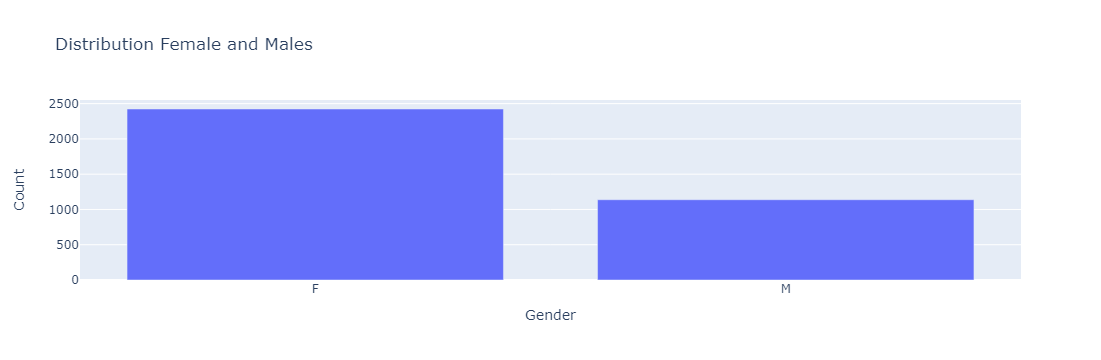

In [24]:
sex_counts=df['sex'].value_counts().to_dict()
fig = go.Figure(data=[go.Bar(x=list(sex_counts.keys()), y=list(sex_counts.values()))])
fig.update_layout(title='Distribution Female and Males ',
                  xaxis_title='Gender',
                  yaxis_title='Count')
fig.show()


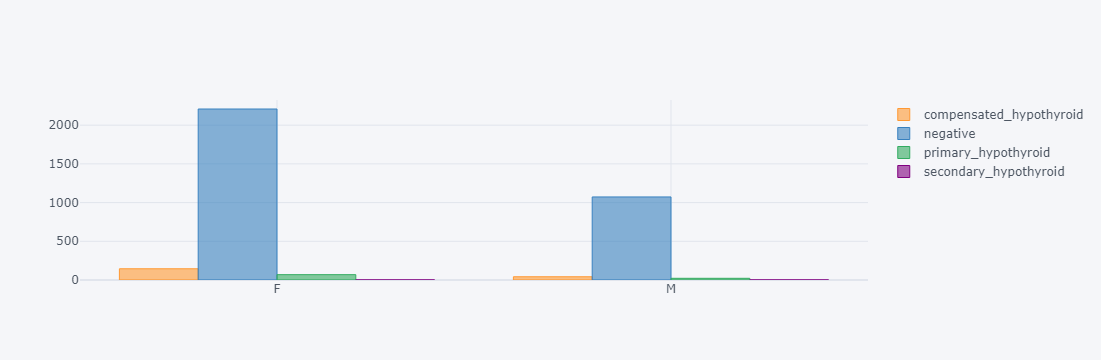

In [25]:
pd.crosstab(df['sex'],df['Class']).iplot(kind='bar')

In [26]:
df['on_thyroxine'].value_counts()

on_thyroxine
f    3247
t     464
Name: count, dtype: int64

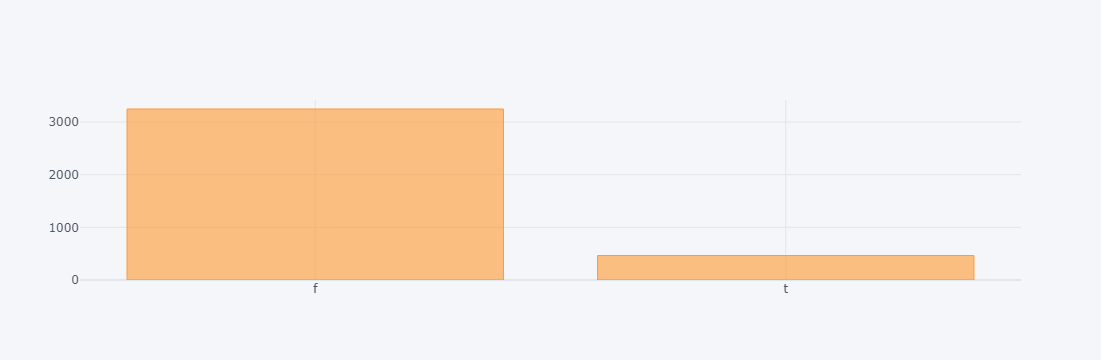

In [27]:
df['on_thyroxine'].value_counts().iplot(kind='bar')

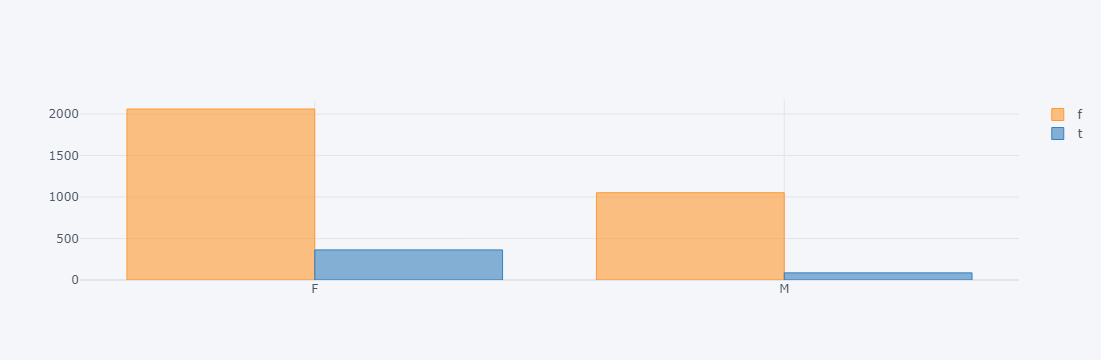

In [28]:
pd.crosstab(df['sex'],df['on_thyroxine']).iplot(kind='bar')

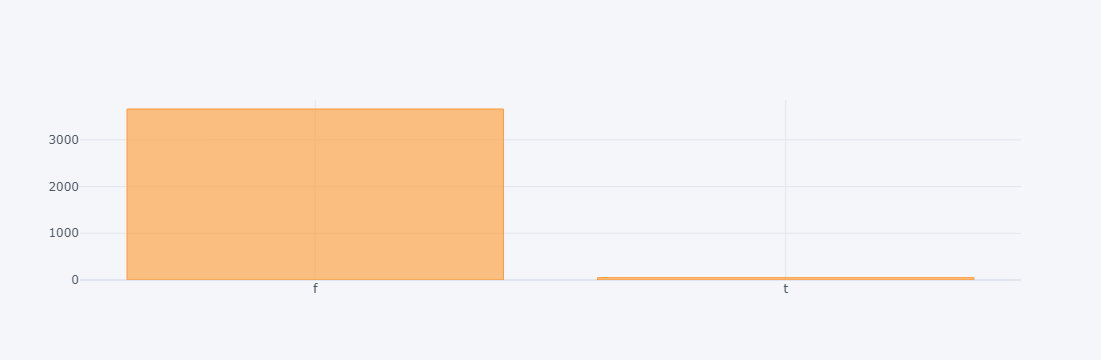

In [29]:
df['query_on_thyroxine'].value_counts().iplot(kind='bar')

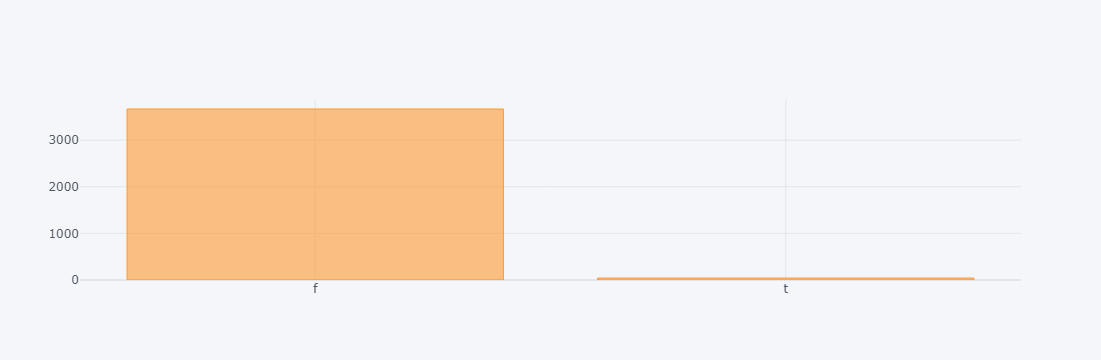

In [30]:
df['on_antithyroid_medication'].value_counts().iplot(kind='bar')

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

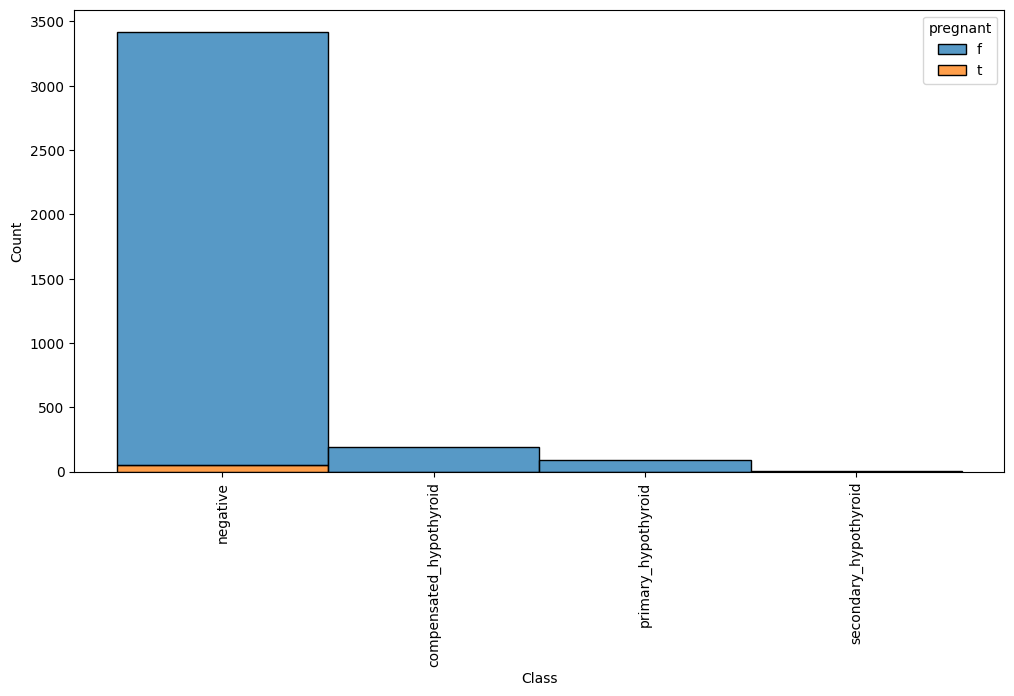

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=df,stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

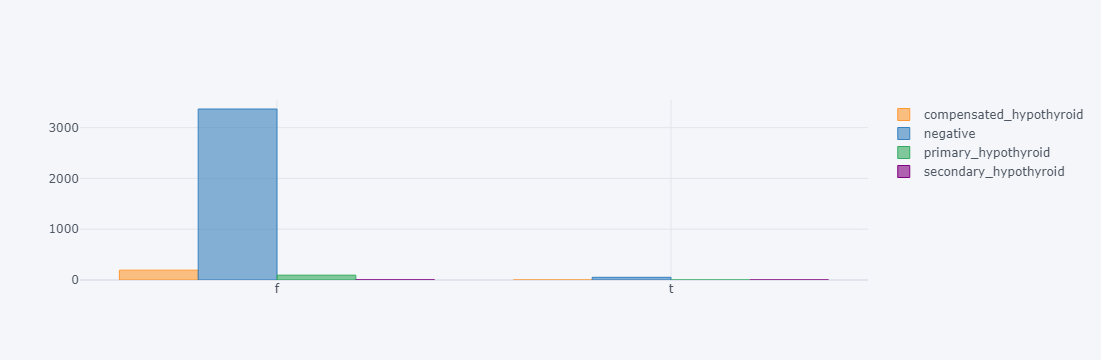

In [32]:
pd.crosstab(df['pregnant'],df['Class']).iplot(kind='bar')

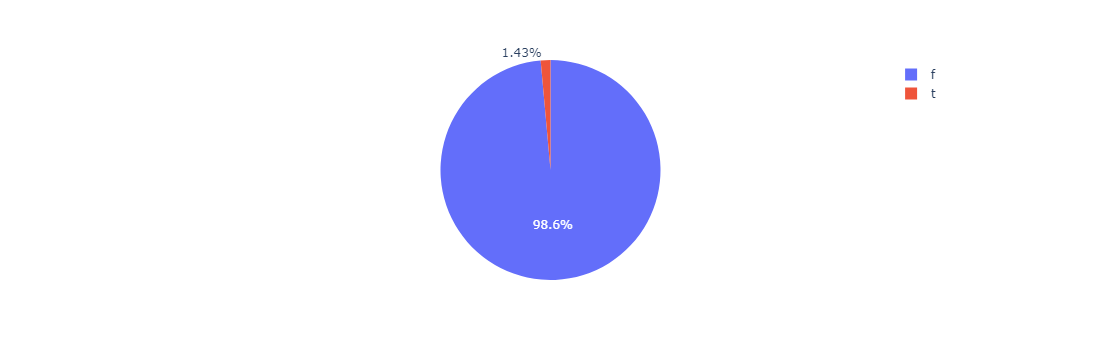

In [33]:
pe.pie(names=df['thyroid_surgery'].value_counts().index,values=df['thyroid_surgery'].value_counts().values)

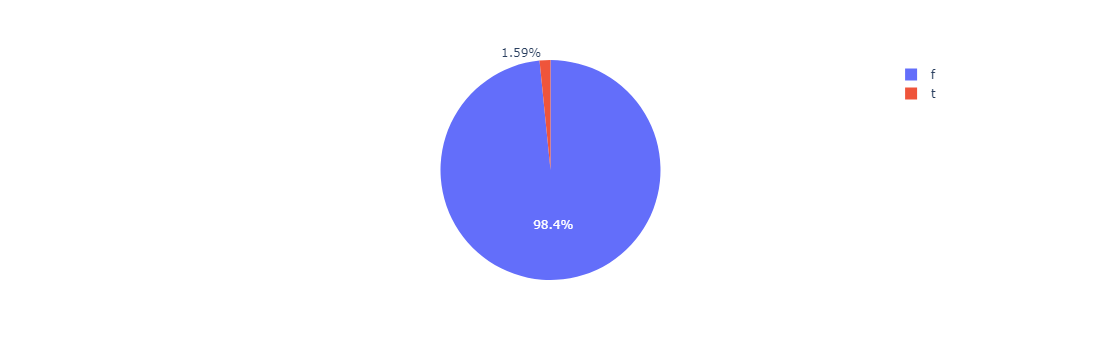

In [34]:
pe.pie(names=df['I131_treatment'].value_counts().index,values=df['I131_treatment'].value_counts().values)

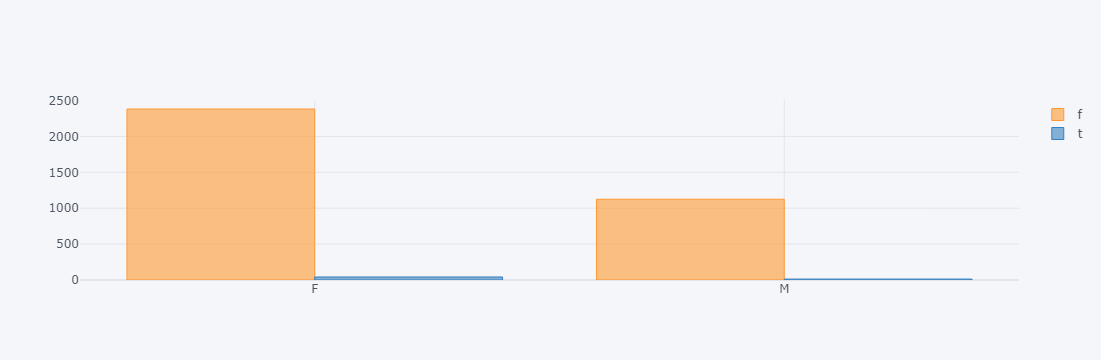

In [35]:
pd.crosstab(df['sex'],df['I131_treatment']).iplot(kind='bar')

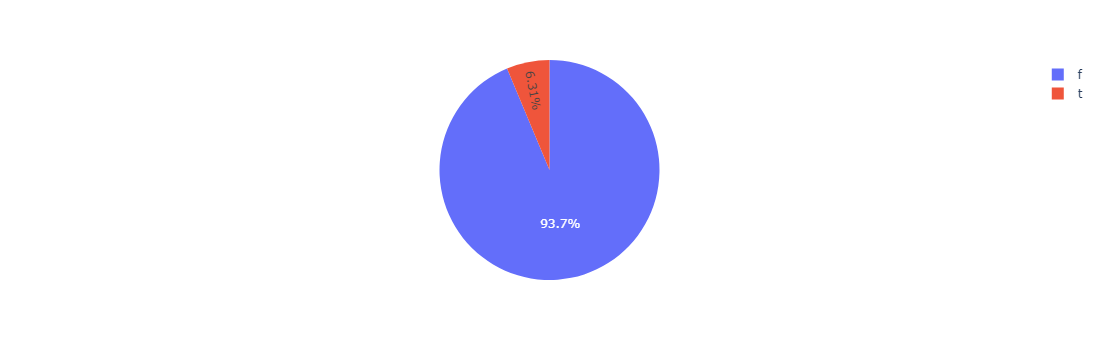

In [36]:
pe.pie(values=df['query_hypothyroid'].value_counts(),names=df['query_hyperthyroid'].value_counts().index)

In [37]:
df['goitre'].value_counts()

goitre
f    3677
t      34
Name: count, dtype: int64

In [38]:
df['tumor'].value_counts()

tumor
f    3615
t      96
Name: count, dtype: int64

<Axes: xlabel='tumor', ylabel='goitre'>

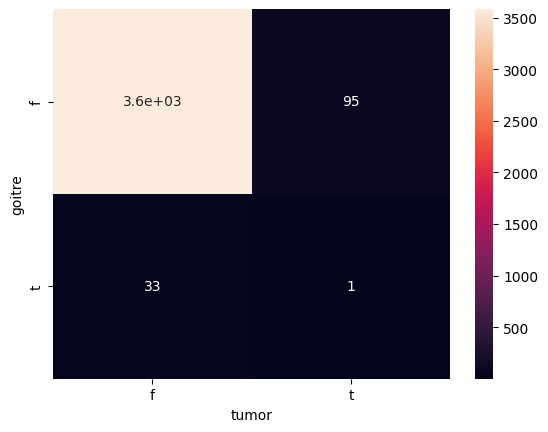

In [39]:
sns.heatmap(pd.crosstab(df['goitre'],df['tumor']),annot=True)

<Axes: xlabel='tumor', ylabel='sex'>

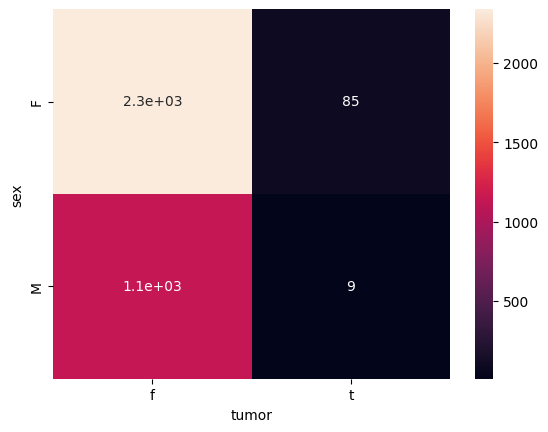

In [40]:
sns.heatmap(pd.crosstab(df['sex'],df['tumor']),annot=True)

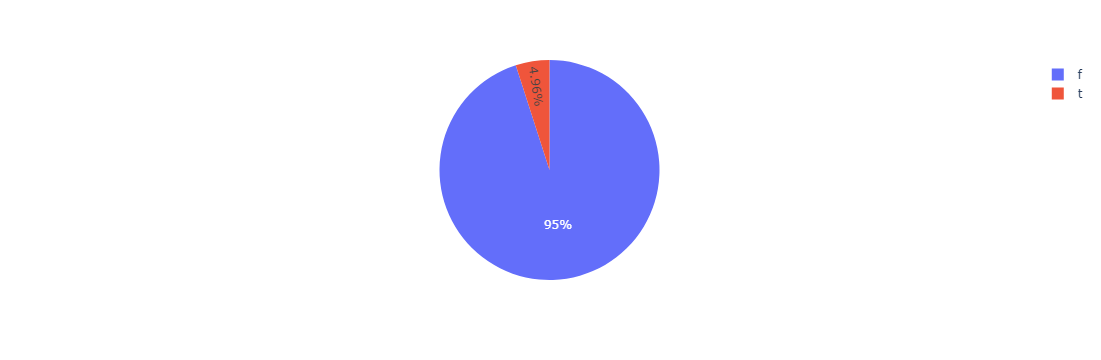

In [41]:
pe.pie(names=df['psych'].value_counts().index,values=df['psych'].value_counts().values)

<Axes: xlabel='psych', ylabel='sex'>

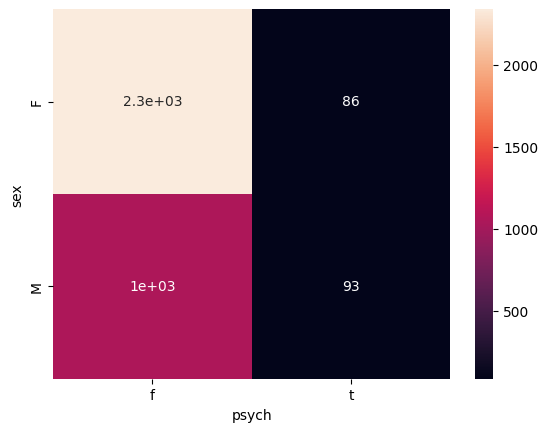

In [42]:
sns.heatmap(pd.crosstab(df['sex'],df['psych']),annot=True)

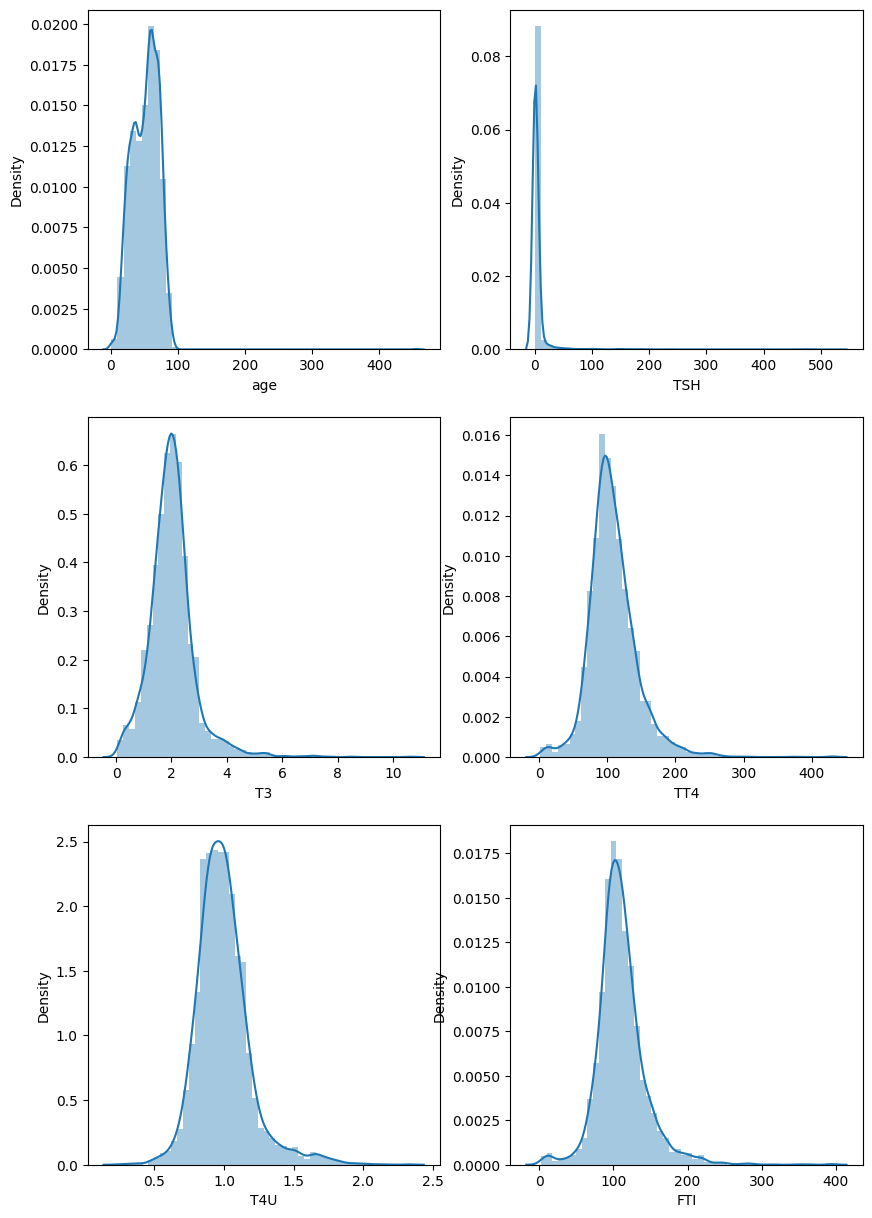

In [43]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [44]:
from scipy.stats import skew

In [45]:
categorical_col = [i for i in df.columns if df[i].dtype == 'O']
categorical_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source',
 'Class']

In [46]:
Numerical_col = [i for i in df.columns if df[i].dtype != 'O']
Numerical_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

Text(0.5, 1.0, 'After transformation')

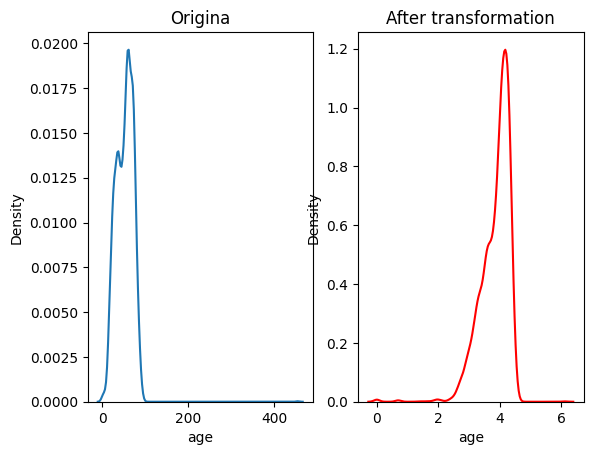

In [47]:
plt.subplot(1,2,1)
sns.kdeplot(df['age'])
plt.title("Origina")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df['age']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

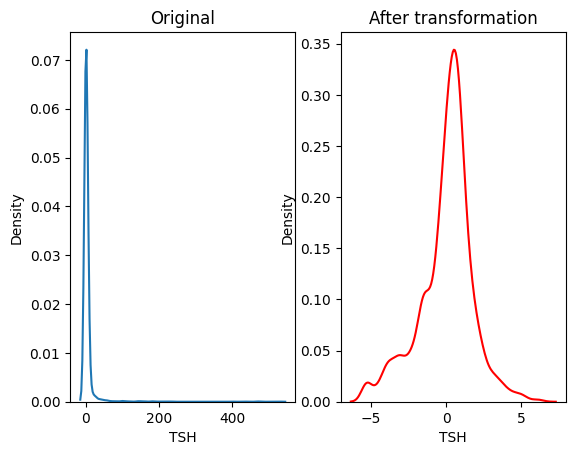

In [48]:
plt.subplot(1,2,1)
sns.kdeplot(df['TSH'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df['TSH']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

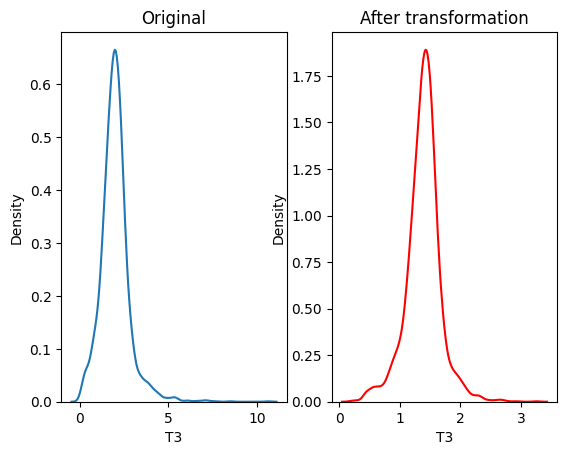

In [49]:
plt.subplot(1,2,1)
sns.kdeplot(df['T3'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df['T3']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

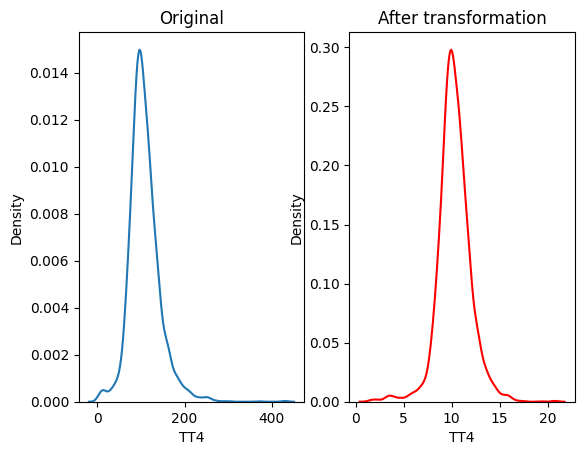

In [50]:
plt.subplot(1,2,1)
sns.kdeplot(df['TT4'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df['TT4']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

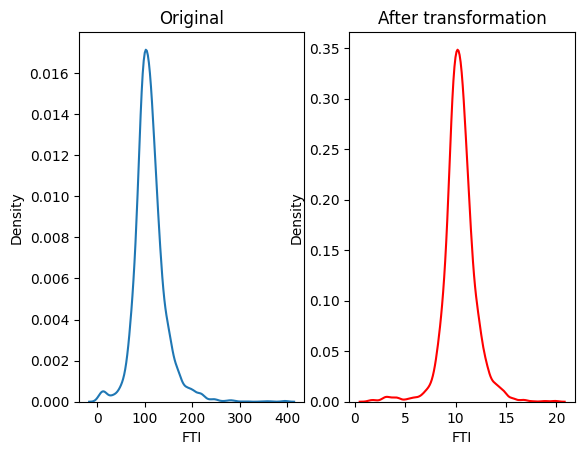

In [51]:
plt.subplot(1,2,1)
sns.kdeplot(df['FTI'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df['FTI']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

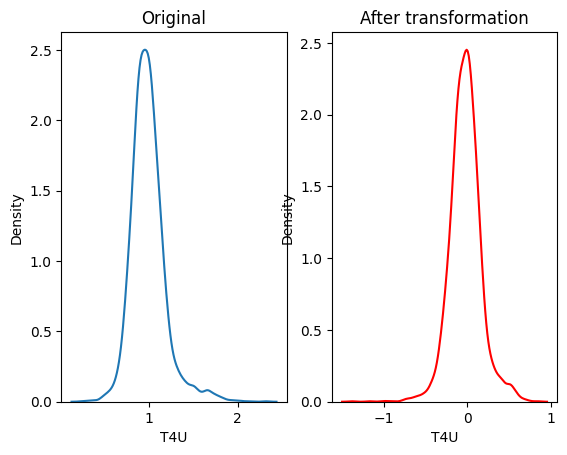

In [52]:
plt.subplot(1,2,1)
sns.kdeplot(df['T4U'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df['T4U']),color='red')
plt.title("After transformation")

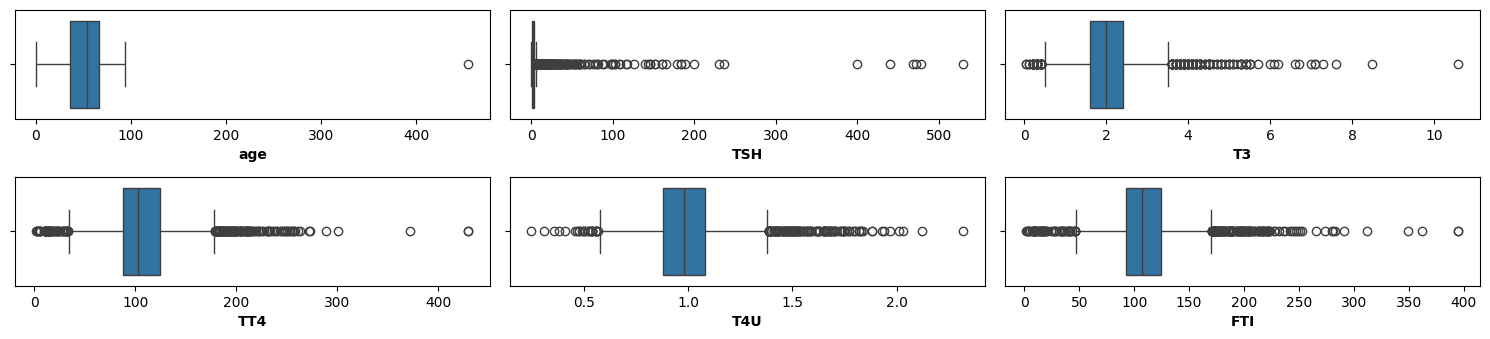

In [53]:
#lets see the outliers in dataset 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [54]:
df.drop('referral_source',axis=1,inplace=True)

In [55]:
df.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.3,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.1,2.0,102.0,NaN,NaN,negative


In [56]:
import scipy.stats as  stats

In [57]:
for feature in ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery',
 'I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']:
    contingency_table = pd.crosstab(df[feature], df['Class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print('Chi-square test of independence for', feature)
    print('Chi-square statistic:', chi2)
    print('P-value:', p)
    print('Degrees of freedom:', dof)
    print('Expected values:', expected)
    print("-------------------------------------------------------------------------")

Chi-square test of independence for sex
Chi-square statistic: 11.410141468107955
P-value: 0.009702764404501154
Degrees of freedom: 3
Expected values: [[1.27256597e+02 2.23345536e+03 6.19270073e+01 1.36103313e+00]
 [5.97434026e+01 1.04854464e+03 2.90729927e+01 6.38966873e-01]]
-------------------------------------------------------------------------
Chi-square test of independence for on_thyroxine
Chi-square statistic: 30.81005520697033
P-value: 9.320384698267207e-07
Degrees of freedom: 3
Expected values: [[1.69743465e+02 2.99238480e+03 8.31218001e+01 1.74993263e+00]
 [2.42565346e+01 4.27615198e+02 1.18781999e+01 2.50067367e-01]]
-------------------------------------------------------------------------
Chi-square test of independence for query_on_thyroxine
Chi-square statistic: 1.4012510105268492
P-value: 0.7052415135771981
Degrees of freedom: 3
Expected values: [[1.91386149e+02 3.37392078e+03 9.37200216e+01 1.97305309e+00]
 [2.61385071e+00 4.60792239e+01 1.27997844e+00 2.69469146e-02]]

In [58]:
df.to_csv("Thyroid_EDA.csv",index=False)

In [59]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative


In [60]:
df.isna().sum().sort_values(ascending=False)

T3                           709
T4U                          327
FTI                          325
TSH                          309
TT4                          171
sex                          149
age                            1
psych                          0
hypopituitary                  0
tumor                          0
goitre                         0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
Class                          0
dtype: int64

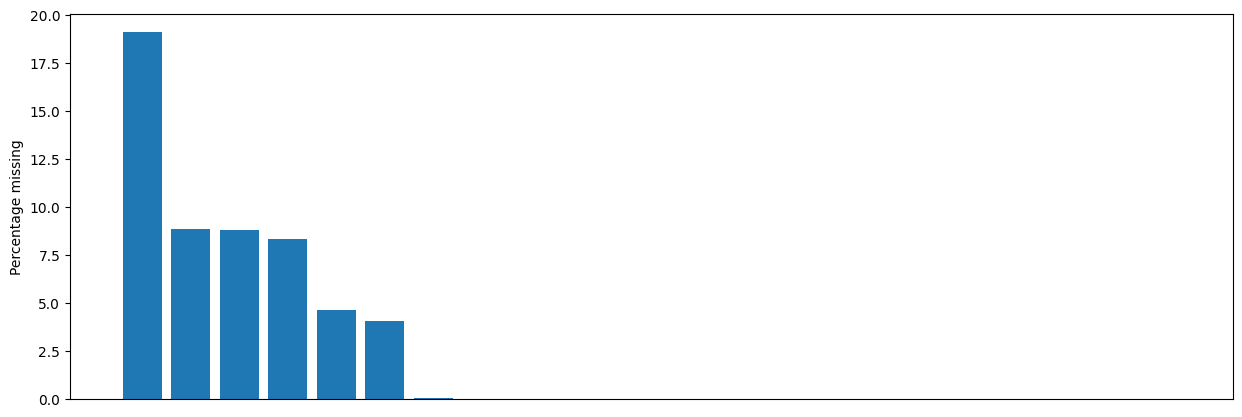

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [62]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 2.4386957693344113%


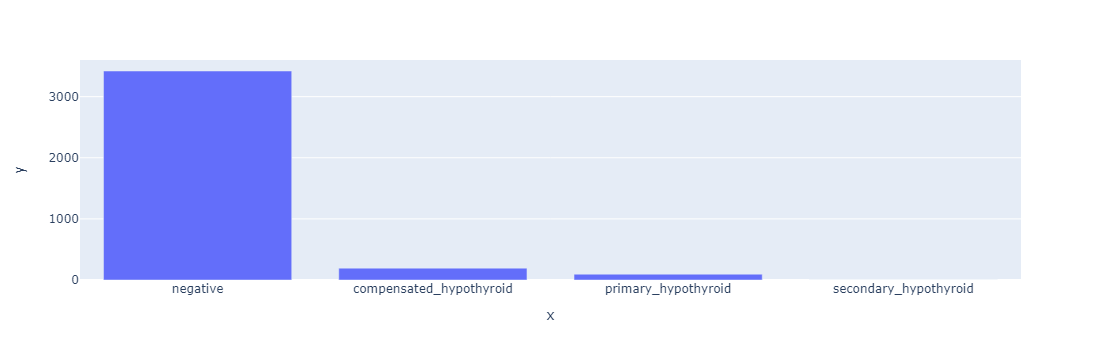

In [63]:
negative = df[df['Class']=='negative'].shape[0]
compensated_hypothyroid= df[df['Class']=='compensated_hypothyroid'].shape[0]
primary_hypothyroid=df[df['Class']=='primary_hypothyroid'].shape[0]
secondary_hypothyroid=df[df['Class']=='secondary_hypothyroid'].shape[0]
pe.bar(df,x=df['Class'].value_counts().index,y=df['Class'].value_counts().values)

In [64]:
Categorical_Features=[cols for cols in df.columns if df[cols].dtypes=='O']
print(Categorical_Features)

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'Class']


In [65]:
Categorical_Features.remove('Class')

In [66]:
Categorical_Features

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych']

In [67]:
Numerical_Features=[cols for cols in df.columns if df[cols].dtypes!='O']
print(Numerical_Features)

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [68]:
X=df.drop('Class',axis=1)
X.shape

(3711, 21)

In [69]:
Categorical_Features=[cols for cols in X.columns if X[cols].dtypes=='O']
print(Categorical_Features)

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']


In [70]:
Numerical_Features=[cols for cols in X.columns if X[cols].dtypes!='O']
print(Numerical_Features)

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [71]:
import joblib

In [72]:
y=df['Class']
y.shape

(3711,)

In [73]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Save the label encoder using joblib
import joblib
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [74]:
np.unique(y_encoded)

array([0, 1, 2, 3])

**missing value imputation (Numerical) by Median and Handling imbalanced Dataset using Random Oversampling**

In [75]:
numeric_transformer =Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='median',missing_values=np.nan)),
                        ('robust_scaler',RobustScaler())])

In [76]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('robust_scaler', RobustScaler())])

In [77]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [78]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [79]:
np.unique(y)

array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [80]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
                            ('num',numeric_transformer,Numerical_Features),
                            ('cat', categorical_transformer, Categorical_Features)])

In [81]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['sex', 'on_thyroxine', 'query_on_thyroxine',
                                  'on_antithyroid_medication', 'sick',
                                  'pregnant', 'thyroid_surgery',
                                  'I131_treatment', 'query_hypothyroid',
                                  'query_hyperthyroid', 'lithium', 'goitre',
                                  'tumor', 'hypopituitary', 'psych'])])

In [82]:
X_scaled=preprocessor.fit_transform(X)

**Feature Selection (top 10 )using SelectKbest**

In [83]:
# Apply feature selection
selector = SelectKBest(f_classif, k=11)
X_selected = selector.fit_transform(X_scaled,y_encoded)

# Get the original feature names for the selected features
mask = selector.get_support()
selected_features = np.array(X.columns)[mask]
print("Selected features:", selected_features)

Selected features: ['sex' 'on_thyroxine' 'query_on_thyroxine' 'on_antithyroid_medication'
 'sick' 'pregnant' 'thyroid_surgery' 'query_hyperthyroid' 'lithium'
 'hypopituitary' 'FTI']


**Feature Selection using Recursive Method**

In [84]:
from sklearn.feature_selection import RFE
# create a linear regression object
model =RandomForestClassifier()
# create the RFE model and select 5 attributes
rfe = RFE(model, n_features_to_select=15, verbose=1)
# fit the RFE model to the data
rfe.fit(X_scaled, y_encoded)
# get the selected feature indices
selected_features = rfe.get_support(indices=True)
# get the original feature names
original_feature_names = list(X.columns[selected_features])
# print the original feature names
print(original_feature_names)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hyperthyroid', 'goitre', 'hypopituitary', 'psych', 'TT4', 'FTI']


**Feature Selection with CrossValidation Recursive method**

In [85]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# create a logistic regression model
clf = DecisionTreeClassifier()

# create a recursive feature elimination object
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5))

# fit the recursive feature elimination object to the data
rfecv.fit(X_scaled, y_encoded)

# print out the selected features
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", [f"Feature {i+1}" for i, s in enumerate(rfecv.support_) if s])

# print out the ranking of all features
print("Feature rankings: ", [f"Feature {i+1} ({rank})" for i, rank in enumerate(rfecv.ranking_)])

# print out the cross-validation scores for each number of features
print("CV scores: ", rfecv.cv_results_['mean_test_score'])

# get the original feature names
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]

# create a list of selected feature names
selected_feature_names = [feature_names[i] for i, s in enumerate(rfecv.support_) if s]

# print out the selected feature names
print("Selected feature names: ", selected_feature_names)


Optimal number of features : 18
Selected features:  ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21']
Feature rankings:  ['Feature 1 (1)', 'Feature 2 (1)', 'Feature 3 (1)', 'Feature 4 (1)', 'Feature 5 (1)', 'Feature 6 (1)', 'Feature 7 (1)', 'Feature 8 (1)', 'Feature 9 (1)', 'Feature 10 (3)', 'Feature 11 (4)', 'Feature 12 (2)', 'Feature 13 (1)', 'Feature 14 (1)', 'Feature 15 (1)', 'Feature 16 (1)', 'Feature 17 (1)', 'Feature 18 (1)', 'Feature 19 (1)', 'Feature 20 (1)', 'Feature 21 (1)']
CV scores:  [0.96173704 0.96820205 0.98544837 0.98814379 0.99380235 0.99353317
 0.99326399 0.99407262 0.99326399 0.99353354 0.99326399 0.99299445
 0.9943418  0.99407262 0.99380308 0.99380308 0.99407262 0.99515042
 0.99461134 0.99434216 0.99434216]
Selected feature names:  ['Feature 1', 'Feature 2', 'Feature 3', 'F

In [86]:
X.columns[[1,2,3,4,5,6,8,13,14,15,16,17,18,19,20]]

Index(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'I131_treatment',
       'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

**Create Functions for model training and evaluation**

In [87]:
def total_cost(y_true, y_pred):
    '''
    This function takes y_true, y_pred, and prints Total cost due to misclassification
    '''
    cm = confusion_matrix(y_true, y_pred)
    cost = 0
    for i in range(cm.shape[0]):
        fp = sum(cm[:,i]) - cm[i,i]
        fn = sum(cm[i,:]) - cm[i,i]
        cost += 10*fp + 500*fn
    return cost

In [88]:
y.shape[0]

3711

In [89]:
y_encoded.shape[0]

3711

In [90]:
def evaluate_clf(true, predicted):
            '''
            This function takes in true values and predicted values
            Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
            '''
            acc = accuracy_score(true, predicted) # Calculate Accuracy
            f1 = f1_score(true, predicted,average='weighted') # Calculate F1-score
            precision = precision_score(true, predicted,average='weighted') # Calculate Precision
            recall = recall_score(true, predicted,average='weighted')  # Calculate Recall
            #roc_auc = roc_auc_score(true, predicted,average='weighted',multi_class='ovr') #Calculate Roc
            return acc, f1 , precision, recall

In [91]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    cost_list=[]
    models_list = []
    accuracy_list = []
    train_recall=[]
    test_recall=[]
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # Create cost of the model as per data description
    

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)
        train_recall.append(model_train_recall)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall=evaluate_clf(y_test, y_test_pred)
        test_recall.append(model_test_recall)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list,train_recall,test_recall,)), columns=['Model Name', 'Cost','Train_Recall','Test_Recall']).sort_values(by=["Cost"])
        
    return report


In [92]:
np.unique(y)

array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [93]:
from imblearn.over_sampling import RandomOverSampler
random_over_sample=RandomOverSampler(random_state=42)

In [94]:
X_resampled,y_resampled=random_over_sample.fit_resample(X_scaled,y_encoded)

In [95]:
X_resampled.shape

(13680, 21)

In [96]:
y_resampled.shape

(13680,)

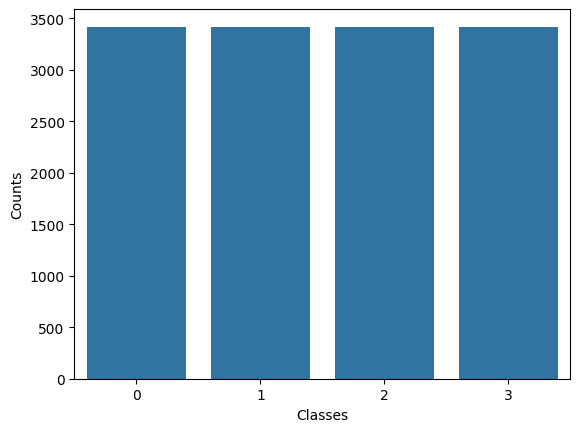

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Create a vertical bar plot using Seaborn
sns.barplot(x=unique_classes, y=class_counts)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()


In [98]:
from xgboost import XGBClassifier
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [99]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
report1 = evaluate_models(X_resampled, y_resampled, models)
report1

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9993
- Recall: 0.9993
- COST: 1020.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9996
- Recall: 0.9996
- COST: 510.


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9993
- Recall: 0.9993
- COST: 1020.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9938
- F1 score: 0.9938
- Precision: 0.9939
- Rec

,Model Name,Cost,Train_Recall,Test_Recall
1,Decision Tree,510,1.000000,0.999635
0,Random Forest,1020,1.000000,0.999269
2,Gradient Boosting,1020,1.000000,0.999269
4,XGBClassifier,1530,1.000000,0.998904
3,K-Neighbors Classifier,9180,0.993787,0.993421
5,AdaBoost Classifier,214200,0.851060,0.846491


**Cross Validation**

In [100]:
from sklearn.metrics import make_scorer, recall_score

In [101]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold

In [102]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [103]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [104]:
# Use cross-validation to evaluate model performance
precision_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=cv, scoring="precision_macro")
recall_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=cv, scoring="recall_macro")
f1_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=cv, scoring="f1_macro")

In [105]:
# Output evaluation metrics for a random forest model
print("Precision_random-forest:", precision_scores.mean())
print("Recall_random_forest:", recall_scores.mean())
print("F1-score_random_forest:", f1_scores.mean())

Precision_random-forest: 0.9985388133162021
Recall_random_forest: 0.9986384130242186
F1-score_random_forest: 0.9987411188062214


**Crossvalidation for test data of Random Forest**

In [106]:
# Calculate random forest model evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision score
precision_rf = precision_score(y_test, RandomForestClassifier().fit(X_train,y_train).predict(X_test), average="macro")
print("Precision_random_forest:", precision_rf)

# Recall score
recall_rf = recall_score(y_test, RandomForestClassifier().fit(X_train,y_train).predict(X_test), average="macro")
print("Recall_random_forest:", recall_rf)

# F1-score
f1_rf = f1_score(y_test, RandomForestClassifier().fit(X_train,y_train).predict(X_test), average="macro")
print("F1-score_forset:", f1_rf)

Precision_random_forest: 0.999029889015916
Recall_random_forest: 0.9992732558139534
F1-score_forset: 0.9992735433066741


**Similrly for Decision Tree**

In [107]:
# Use cross-validation to evaluate model performance
precision_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring="precision_macro")
recall_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring="recall_macro")
f1_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring="f1_macro")

# Output evaluation metrics for a random forest model
print("Precision_random-forest:", precision_scores.mean())
print("Recall_random_forest:", recall_scores.mean())
print("F1-score_random_forest:", f1_scores.mean())

# Calculate random forest model evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

def random_forest_metrics(X_train, X_test, y_train, y_test):
    """
    Calculate precision, recall, and F1 score for a random forest model.

    Parameters:
    X_train (numpy array): training input data
    X_test (numpy array): testing input data
    y_train (numpy array): training output data
    y_test (numpy array): testing output data

    Returns:
    None
    """
    # Precision score
    precision_rf = precision_score(y_test, DecisionTreeClassifier().fit(X_train,y_train).predict(X_test), average="macro")
    print("Precision_random_forest:", precision_rf)

    # Recall score
    recall_rf = recall_score(y_test, DecisionTreeClassifier().fit(X_train,y_train).predict(X_test), average="macro")
    print("Recall_random_forest:", recall_rf)

    # F1-score
    f1_rf = f1_score(y_test, DecisionTreeClassifier().fit(X_train,y_train).predict(X_test), average="macro")
    print("F1-score_forest:", f1_rf)

random_forest_metrics(X_train, X_test, y_train, y_test)

Precision_random-forest: 0.999168588625642
Recall_random_forest: 0.9990577002359586
F1-score_random_forest: 0.9991639183790954
Precision_random_forest: 0.9995144734063415
Recall_random_forest: 0.999515503875969
F1-score_forest: 0.9992702468178922


#After cross validation Decison Tree is giving 99.9 % for Train Dataset and 99.7% for Test Dataset

**Handling imbalanced dataset using SMOTE**

In [108]:
X_scaled

array([[-0.41935484, -0.05221932,  0.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  1.40992167,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25806452, -0.21932115,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64516129,  1.93211488, -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58064516, -0.36553525,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32258065, -0.20887728,  0.33333333, ...,  0.        ,
         0.        ,  0.        ]])

In [109]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=42,k_neighbors=1)
X_res_smote,y_res_smote=smt.fit_resample(X_scaled,y_encoded)

In [110]:
report2=evaluate_models(X_res_smote,y_res_smote,models)
report2

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9989
- F1 score: 0.9989
- Precision: 0.9989
- Recall: 0.9989
- COST: 1530.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9985
- Recall: 0.9985
- COST: 2040.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9998
- Recall: 0.9998
- COST: 1020.
----------------------------------
Model performance for Test set
- Accuracy: 0.9967
- F1 score: 0.9967
- Precision: 0.9967
- Recall: 0.9967
- COST: 4590.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9926
- F1 score: 0.9926
- Precision: 0.9927
-

,Model Name,Cost,Train_Recall,Test_Recall
0,Random Forest,1530,1.000000,0.998904
1,Decision Tree,2040,1.000000,0.998538
4,XGBClassifier,2550,1.000000,0.998173
2,Gradient Boosting,4590,0.999817,0.996711
3,K-Neighbors Classifier,10710,0.992599,0.992325
5,AdaBoost Classifier,357000,0.748995,0.744152


In [111]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=10,shuffle=True)
k_f

KFold(n_splits=10, random_state=None, shuffle=True)

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X_res_smote,y_res_smote,test_size=0.3,random_state=42)

In [113]:
print("Mean of cross validation score for Random Forest model==>",cross_val_score(RandomForestClassifier(),X_train,y_train,cv=k_f).mean())
print("Mean of cross validation score for Decision Tree  model==>",cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=k_f).mean())

Mean of cross validation score for Random Forest model==> 0.9979111175101385
Mean of cross validation score for Decision Tree  model==> 0.9967630011147397


**PCA**

In [114]:
X=df.drop('Class',axis=1)
y=df['Class']

In [115]:
y=LabelEncoder().fit_transform(y)

In [116]:
numeric_transformer =Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='constant',missing_values=np.nan,fill_value=0)),
                        ('robust_scaler',RobustScaler())])

In [117]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [118]:
 pca_preprocessor = ColumnTransformer([
                            ('num',numeric_transformer,Numerical_Features),
                            ('cat', categorical_transformer, Categorical_Features)])

In [119]:
X_pca=pca_preprocessor.fit_transform(X)

In [120]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,21):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [121]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=7,random_state=42).fit(X_resampled)

reduced=pca_final.fit_transform(X_pca)

In [122]:
# Resampling the minority class. The strategy can be changed as required.
smt =RandomOverSampler(random_state=42)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42,test_size=0.2)

In [124]:
report3 = evaluate_models(X_res, y_res, models)
report3

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9956
- F1 score: 0.9956
- Precision: 0.9957
- Recall: 0.9956
- COST: 6120.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9971
- F1 score: 0.9971
- Precision: 0.9971
- Recall: 0.9971
- COST: 4080.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9989
- F1 score: 0.9989
- Precision: 0.9989
- Recall: 0.9989
- COST: 6120.
----------------------------------
Model performance for Test set
- Accuracy: 0.9960
- F1 score: 0.9960
- Precision: 0.9960
- Recall: 0.9960
- COST: 5610.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9933
- F1 score: 0.9933
- Precision: 0.9935
-

,Model Name,Cost,Train_Recall,Test_Recall
1,Decision Tree,4080,1.000000,0.997076
2,Gradient Boosting,5610,0.998904,0.995980
0,Random Forest,6120,1.000000,0.995614
4,XGBClassifier,6630,1.000000,0.995249
3,K-Neighbors Classifier,12240,0.993330,0.991228
5,AdaBoost Classifier,568140,0.587171,0.592836


**feature importance for our Decision Tree model**

In [125]:
model=DecisionTreeClassifier()

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [127]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
importances = model.feature_importances_

In [129]:
importances

array([1.66098834e-02, 3.27814285e-01, 5.74065087e-03, 3.51186554e-01,
       4.79203623e-04, 2.86115298e-01, 0.00000000e+00, 1.03491748e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.46137176e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.43577641e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [130]:
# Create a DataFrame with feature names and importances
features_df = pd.DataFrame({'feature_name': X.columns, 'importance': importances})
features_df

,feature_name,importance
0,age,0.016610
1,sex,0.327814
2,on_thyroxine,0.005741
3,query_on_thyroxine,0.351187
4,on_antithyroid_medication,0.000479
5,sick,0.286115
6,pregnant,0.000000
7,thyroid_surgery,0.010349
8,I131_treatment,0.000000
9,query_hypothyroid,0.000000


In [131]:
# Sort the features by importance
features_df = features_df.sort_values('importance', ascending=False)

In [132]:
features_df

,feature_name,importance
3,query_on_thyroxine,0.351187
1,sex,0.327814
5,sick,0.286115
0,age,0.016610
7,thyroid_surgery,0.010349
2,on_thyroxine,0.005741
12,goitre,0.001461
4,on_antithyroid_medication,0.000479
17,T3,0.000244
14,hypopituitary,0.000000


In [133]:
# Get the top n features
n = 10
top_n_features = list(features_df['feature_name'][:n])

# Print the top n features
print(f'Top {n} features:')
print(top_n_features)

Top 10 features:
['query_on_thyroxine', 'sex', 'sick', 'age', 'thyroid_surgery', 'on_thyroxine', 'goitre', 'on_antithyroid_medication', 'T3', 'hypopituitary']


# model on selected features from RFECV and check performance of train and test dataset 

In [134]:
X.columns[[1,2,3,4,5,6,8,13,14,15,16,17,18,19,20]]

Index(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'I131_treatment',
       'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [135]:
df1=pd.read_csv("Thyroid_EDA.csv",usecols=['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'I131_treatment',
       'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','Class'])

In [136]:
df1.shape

(3711, 16)

In [137]:
df1.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,I131_treatment,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,F,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,F,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,M,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,F,t,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,F,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative


In [138]:
Num_cols=[cols for cols in df1.columns if df1[cols].dtype!='O']
print(Num_cols)

['TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [139]:
Cat_cols=[cols for cols in df1.columns if df1[cols].dtype=='O']
print(Cat_cols)

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'I131_treatment', 'tumor', 'hypopituitary', 'psych', 'Class']


In [140]:
#lets do separation of target variable 
X=df1.drop('Class',axis=1)
print(X.shape)

(3711, 15)


In [141]:
#Lets do transformation pipeline for Numerical and Categorical Columns 
numeric_transformer =Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='median',missing_values=np.nan)),
                        ('robust_scaler',RobustScaler())])

In [142]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))])

In [143]:
Cat_cols.remove('Class')

In [144]:
 preprocessor_final = ColumnTransformer([
                            ('num',numeric_transformer,Num_cols),
                            ('cat', categorical_transformer, Cat_cols)])

In [145]:
step2=DecisionTreeClassifier()

In [146]:
pipe=Pipeline([('preprocessor1',preprocessor_final),
               ('step2',step2)])
pipe.fit(X,y)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['TSH', 'T3', 'TT4', 'T4U',
                                                   'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'on_thyroxine',
                                                   'query_on_thyroxine',
                                                   'on_antithyroid_medication',
                                                   'sick', 'pregnant',
                                                   'I131_treatment', 'tumor',
                                                   'hypopituitary',
                                                   'psych'])])),
                ('step2', DecisionTreeClassifier())])

In [147]:
X_scaled_final=preprocessor_final.fit_transform(X)

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
le=joblib.load('label_encoder.joblib')
le

LabelEncoder()

In [150]:
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [151]:
smt=SMOTE(random_state=42,k_neighbors=1)
X_res1,y_res1=smt.fit_resample(X_scaled_final,y,)

In [152]:
report4=evaluate_models(X_res1,y_res1,models)
report4

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- COST: 510.
----------------------------------
Model performance for Test set
- Accuracy: 0.9978
- F1 score: 0.9978
- Precision: 0.9978
- Recall: 0.9978
- COST: 3060.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9974
- F1 score: 0.9974
- Precision: 0.9975
- Recall: 0.9974
- COST: 3570.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9994
- Precision: 0.9994
- Recall: 0.9994
- COST: 3570.
----------------------------------
Model performance for Test set
- Accuracy: 0.9938
- F1 score: 0.9938
- Precision: 0.9938
- Recall: 0.9938
- COST: 8670.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9938
- F1 score: 0.9938
- Precision: 0.9939

,Model Name,Cost,Train_Recall,Test_Recall
0,Random Forest,3060,0.999909,0.997807
1,Decision Tree,3570,1.000000,0.997442
4,XGBClassifier,3570,1.000000,0.997442
2,Gradient Boosting,8670,0.999360,0.993787
3,K-Neighbors Classifier,11730,0.993787,0.991594
5,AdaBoost Classifier,421770,0.704130,0.697734


#  randomoversampling technique to handle imbalanced daatset with selected features

In [153]:
random=RandomOverSampler()

In [154]:
X_res2,y_res2=random.fit_resample(X_scaled_final,y)

In [155]:
report5=evaluate_models(X_res2,y_res2,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9989
- F1 score: 0.9989
- Precision: 0.9989
- Recall: 0.9989
- COST: 1530.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9993
- Recall: 0.9993
- COST: 1020.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9998
- Recall: 0.9998
- COST: 1020.
----------------------------------
Model performance for Test set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9985
- Recall: 0.9985
- COST: 2040.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9947
- F1 score: 0.9947
- Precision: 0.9948
-

In [156]:
report5

,Model Name,Cost,Train_Recall,Test_Recall
1,Decision Tree,1020,1.000000,0.999269
0,Random Forest,1530,1.000000,0.998904
2,Gradient Boosting,2040,0.999817,0.998538
4,XGBClassifier,2040,1.000000,0.998538
3,K-Neighbors Classifier,9690,0.994700,0.993056
5,AdaBoost Classifier,321300,0.770102,0.769737


In [157]:
import joblib
import pickle

In [158]:
with open('df.pkl','wb')as file:
    pickle.dump(df1,file)

In [159]:
joblib.dump(pipe,'final_pipe_object.joblib')

['final_pipe_object.joblib']

# Prediction on new dataset with created model

In [160]:
df = pd.read_pickle('df.pkl')

In [161]:
df.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,I131_treatment,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,F,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,F,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,M,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,F,t,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,F,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative


In [162]:
model=joblib.load('final_pipe_object.joblib')

In [163]:
label_predictor=joblib.load('label_encoder.joblib')

In [164]:
model

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['TSH', 'T3', 'TT4', 'T4U',
                                                   'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'on_thyroxine',
                                                   'query_on_thyroxine',
                                                   'on_antithyroid_medication',
                                                   'sick', 'pregnant',
                                                   'I131_treatment', 'tumor',
                                                   'hypopituitary',
                                                   'psych'])])),
                ('step2', DecisionTreeClassifier())])

In [190]:
df1.sample(2)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,I131_treatment,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
1355,M,f,f,f,f,f,f,f,f,f,1.5,1.7,97.0,0.76,129.0,negative
1064,F,t,f,f,f,f,f,f,f,f,1.9,NaN,167.0,1.43,117.0,negative


In [191]:
data={
   'sex':'M',
    'on_thyroxine':'f',
    'query_on_thyroxine':'f',
    'on_antithyroid_medication':'f',
    'sick':'f',
    'pregnant':'f',
    'I131_treatment':'f',
    'tumor':'f',
    'hypopituitary':'f',
    'psych':'f',
    'TSH':7.50,
    'T3':1.6,
    'TT4':82.0,
    'T4U':1.08,
    'FTI':65.0
}

In [192]:
df_test=pd.DataFrame(data,index=[0])
df_test

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,I131_treatment,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,M,f,f,f,f,f,f,f,f,f,7.5,1.6,82.0,1.08,65.0


In [193]:
label_predictor.inverse_transform([1])

array(['negative'], dtype=object)

In [194]:
model.predict(df_test)[0]

0

In [195]:
data2={
   'sex':'F',
    'on_thyroxine':'f',
    'query_on_thyroxine':'f',
    'on_antithyroid_medication':'f',
    'sick':'f',
    'pregnant':'t',
    'I131_treatment':'f',
    'tumor':'f',
    'hypopituitary':'f',
    'psych':'f',
    'TSH':7.50,
    'T3':1.9,
    'TT4':190.0,
    'T4U':1.08,
    'FTI':65.0
}

In [196]:
df_test=pd.DataFrame(data2,index=[0])
df_test

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,I131_treatment,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,F,f,f,f,f,t,f,f,f,f,7.5,1.9,190.0,1.08,65.0


In [211]:
model.predict(df_test)[0]

1